In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from framework_pkg.framework import FrameWork

plt.rcParams['text.usetex']=True
plt.style.use('classic')

param ={'SinT12'  : 0.408 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0.25, 
        'mu3'  : 0.  ,
        'mdm'  : 4e-4, 
        'alpha': 0.  ,
        'eps' : 0.8  ,
        'alpha_eps' : 0.  ,
        'M12'  : 6.9e-5 }


frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                    )

data = np.loadtxt('./Data/modulation_data.txt')
annual_data = np.array(pd.read_csv('./Data/plot-data.csv'))

# frame_predicted_total_signal.time_weights = np.loadtxt('./Data/time_exposures_2.txt')

msw_signal_fraction = frame_predicted_total_signal.__getitem__(param) 

<ErrorbarContainer object of 3 artists>

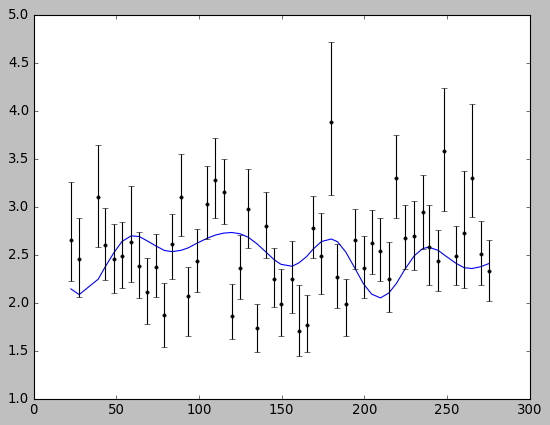

In [10]:
time_bins = np.unique(frame_predicted_total_signal.time_day[:,0])

bin_prediction = np.zeros((len(time_bins)))
for i in range(len(time_bins)):
    cond = frame_predicted_total_signal.time_day[:,0] == time_bins[i]
    T_k = np.sum(frame_predicted_total_signal.time_day[cond,2:],axis=1)
    bin_prediction[i] = (1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction[cond])

plt.plot(data[:50,0], bin_prediction[:50], '-')
plt.errorbar(data[:50,0], data[:50,1], np.array((data[:50,3],data[:50,2])), fmt='k.')

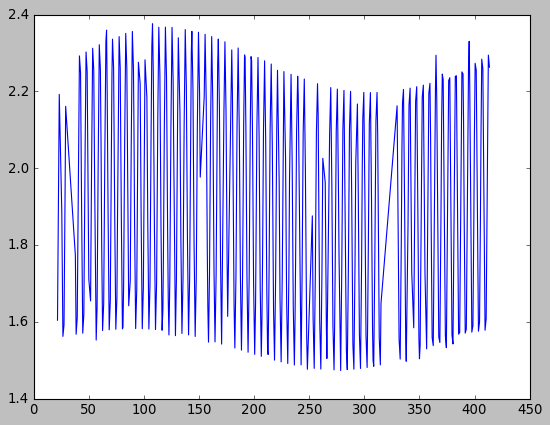

In [4]:
#plt.plot(frame_predicted_total_signal.energy_nu, np.mean(frame_predicted_total_signal.p_msw, axis=0))
#plt.plot(frame_predicted_total_signal.energy_nu, np.mean(msw_signal_fraction,axis=0))
#plt.plot(frame_predicted_total_signal.energy_nu, np.mean(frame_predicted_total_signal.pes, axis=0))


plt.plot(frame_predicted_total_signal.time_day[:400,1], msw_signal_fraction[:400], '-')

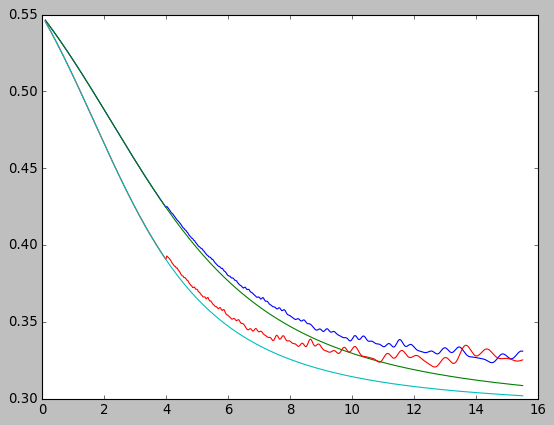

In [2]:
param['SinT12']  = 0.308
param['M12'] = 8e-5
I_evol, mass_weights = frame_predicted_total_signal.__getitem__(param)
plt.plot(frame_predicted_total_signal.energy_nu, np.sum(mass_weights * I_evol[:,:,1], axis=1))
plt.plot(frame_predicted_total_signal.energy_nu, np.sum(mass_weights * I_evol[:,:,0], axis=1))

param['SinT12']  = 0.308
param['M12'] = 6e-5
I_evol, mass_weights = frame_predicted_total_signal.__getitem__(param)
plt.plot(frame_predicted_total_signal.energy_nu, np.sum(mass_weights * I_evol[:,:,1], axis=1))
plt.plot(frame_predicted_total_signal.energy_nu, np.sum(mass_weights * I_evol[:,:,0], axis=1))

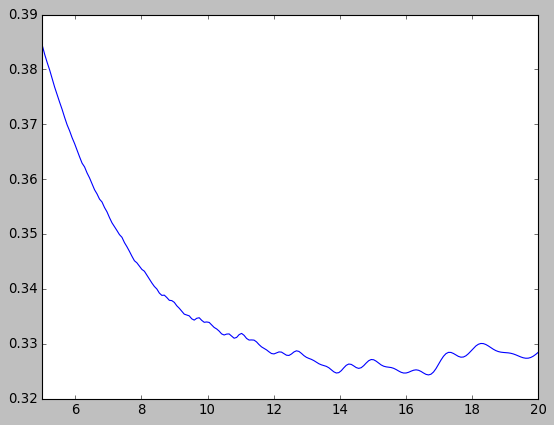

In [13]:
#plt.xscale('log')
#plt.ylim(0.2,0.6)
plt.xlim(5, 20)

#plt.plot(enu, np.sum(mass_weights * np.square(np.abs((pmns.pmns)))[0,:], axis=1) )
#plt.plot(enu, np.sum(mass_weights * evol[:,0,:], axis=1) - np.sum(mass_weights * np.square(np.abs((pmns.pmns)))[0,:], axis=1) )

plt.plot(enu, evol)

#plt.plot(enu,  (0.003 * enu * np.cos(2*np.pi * 30 /enu) + 0.004 * enu * np.cos(2*np.pi * 20 /enu) + 0.005 * enu * np.cos(2*np.pi * 40 /enu))**2  ) 

#plt.plot(enu, evol[:,0,0]/np.square(np.abs((pmns.pmns)))[0,0],'b-')

#plt.plot(enu, evol[:,1,0]/np.square(np.abs((pmns.pmns)))[1,0],'r-')

In [ ]:
# # Detector depth normalised to Earth radius
# h = depth / R_E

# # Position of detector the on a radial path
# r_d = 1 - h # This is valid for eta = 0

# eta_prime = asin(r_d * sin(eta))

# # Position of the detector along the trajectory coordinate
# # x_d = sqrt(r_d**2 - sin(eta)**2) -- wrong old definition
# x_d = r_d * cos(eta)

# # params is a list of lists, each element [a, b, c, x_i] contains the parameters of the density
# # profile n_e(x) = a + b x^2 + c x^4 along the crossed shell, with each shell ending at x == x_i
# params = density.parameters(eta_prime)
# params2 = np.flipud(params)

# # xshells contains the end coordinate x == x_i for each crossed earth density shell
# xshells = density.shells_x(eta_prime)
# xshells2 = np.flipud(xshells)

# print(params)
# print(xshells2)

[[  6.099  -4.119   0.      0.192]
 [  5.803  -3.653  -1.086   0.546]
 [  3.156  -1.459   0.28    0.895]
 [ -5.376  19.21  -12.52    0.937]
 [ 11.54  -20.28   10.41    1.   ]]
[1.    0.937 0.895 0.546 0.192]


In [2]:
theta_12 = [0.2,0.3,0.4]

color = ['b','r','g']
dt_eta = frame_predicted_total_signal.dt_dcos_eta
cos_eta = frame_predicted_total_signal.cos_eta
ind     = frame_predicted_total_signal.ind

#plt.yscale('log')



param['SinT12'] = 0.308
u_day, u_night, mass_w = frame_predicted_total_signal.__getitem__(param)

pee_day = np.sum(mass_w[:,:,np.newaxis] * u_day, axis=1)
pee_night = np.sum(mass_w[:,:,np.newaxis] * u_night, axis=1)

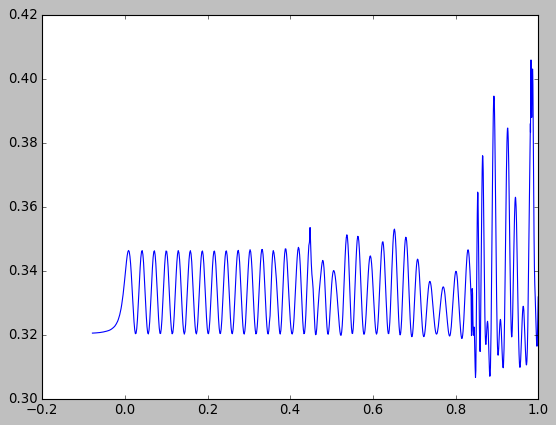

In [5]:
plt.plot(np.cos((np.pi/2) * np.linspace(0,1.05,1000)), pee_night[100])

4.190115316070878 4.197517966243525 4.356659153140043


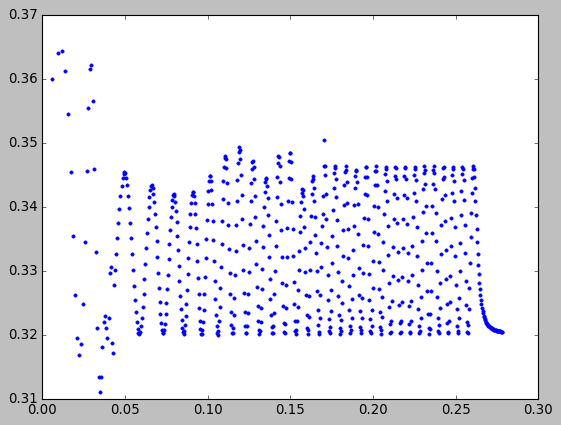

In [ ]:
cos_eta_night = np.cos((np.pi/2) * np.linspace(0,1.05,1000))
a_list = np.zeros((3,len(ind)))
for i in range(len(ind)):
    index_year = i
    sorted_indices = np.argsort(cos_eta[index_year])

    t_cos_eta = np.interp(cos_eta_night[cos_eta_night< np.max(cos_eta[index_year])], cos_eta[index_year][sorted_indices], np.linspace(0+1e-6, 0.5-1e-6, int(1e5))[sorted_indices])


    a_list[0,i] = np.mean(pee_night[100][cos_eta_night < np.max(cos_eta[index_year])])
    a_list[1,i] = np.mean(pee_night[100])
    a_list[2,i] = np.trapz(pee_night[100][cos_eta_night < np.max(cos_eta[index_year])] , t_cos_eta)

    plt.plot(t_cos_eta, pee_night[100][cos_eta_night < np.max(cos_eta[index_year])], '.')

    print(a_list[0,i]*frame_predicted_total_signal.T_night[i], a_list[1,i]*frame_predicted_total_signal.T_night[i], 24*2*a_list[2,i])
    break


# plt.plot(a_list[0]*frame_predicted_total_signal.T_night)
# plt.plot(a_list[1]*frame_predicted_total_signal.T_night)
# plt.plot(a_list[2]*24*2, '.')




#plt.plot(cos_eta[index_year], np.linspace(0+1e-6, 0.5-1e-6, int(1e5)))
#plt.plot(cos_eta_night[cos_eta_night< np.max(cos_eta[0])])

#plt.plot(cos_eta_night[cos_eta_night< np.max(cos_eta[index_year])], t_cos_eta , '.')

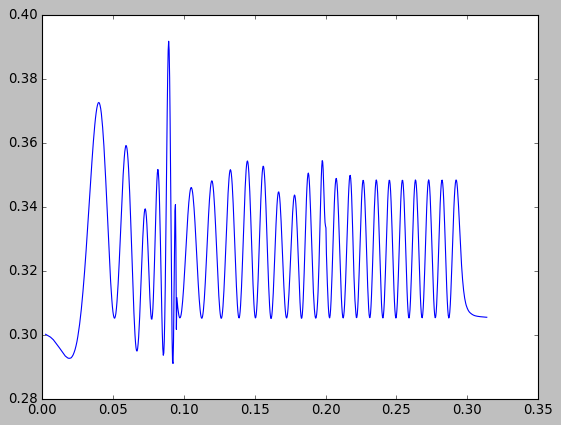

In [16]:
for i, j in enumerate ([150]):
    #plt.plot(np.cos((np.pi/2) *  np.array([1.05, 1.1, 2])) , pee_day[j] , '-', color=color[i])
    #plt.plot(np.cos((np.pi/2) * np.linspace(0,1.05,500)) , pee_night[j] , '-',color=color[i])
    plt.plot(t_cos_eta , pee_night[j][cos_eta_night< np.max(cos_eta[index_year])] , '-',color=color[i])

In [ ]:
pee_day_list = np.zeros((2,len(ind)))
pee_night_list = np.zeros((2,len(ind)))

for i in range (len(ind)):
    #plt.plot(cos_eta[0,ind[0]:], dt_eta[0,ind[0]:])
    pee_day_intp = np.interp(cos_eta[i,ind[i]:], np.cos((np.pi/2) * np.array([1, 1.05, 1.1, 1.2, 1.5, 2])), pee_day[100] )
    #plt.plot(np.cos((np.pi/2) * np.linspace(1,2,70)) , pee_day[100] , '-',color=color[0])
    #plt.plot(cos_eta[0,ind[0]:] , pee_day_intp * dt_eta[0,ind[0]:] , '-',color=color[1])
    pee_day_list[0,i] = np.trapz(pee_day_intp * dt_eta[i,ind[i]:],cos_eta[i,ind[i]:]) #/np.trapz(dt_eta[i,ind[i]:],cos_eta[i,ind[i]:]))
    pee_day_list[1,i] = np.mean(pee_day[100]) * np.trapz(dt_eta[i,ind[i]:],cos_eta[i,ind[i]:])
    

    #plt.plot(cos_eta[0,:ind[0]], dt_eta[0,:ind[0]])
    pee_night_intp = np.interp(cos_eta[i, :ind[i]], np.cos((np.pi/2) * np.array([0, 0.2, 0.4, 0.6, 0.8, 0.85, 0.9, 0.95])), pee_night[100] )
    #plt.plot(np.cos((np.pi/2) * np.linspace(0,0.99,100)) , pee_night[100] , '-',color=color[0])
    #plt.plot(cos_eta[0,:ind[0]] , pee_night_intp * dt_eta[0,:ind[0]] , '-', color=color[1])
    pee_night_list[0,i] = np.trapz(pee_night_intp * dt_eta[i,:ind[i]],cos_eta[i,:ind[i]]) #/np.trapz(dt_eta[i,:ind[i]],cos_eta[i,:ind[i]]))
    pee_night_list[1,i] = np.mean(pee_night[100]) * np.trapz(dt_eta[i,:ind[i]],cos_eta[i,:ind[i]])
    
    
    #print(np.trapz(dt_eta[i,:ind[i]],cos_eta[i,:ind[i]]))
    #print(np.trapz(dt_eta[i,ind[i]:],cos_eta[i,ind[i]:]))
    
    


# #dt_eta_inp = np.interp(np.cos((np.pi/2) * np.linspace(1,2,70)),  )
# for j,i in enumerate (theta_12):
#     param['SinT12'] = 0.308
#     u_day, u_night, mass_w = frame_predicted_total_signal.__getitem__(param)


#     pee_day = np.sum(mass_w[:,:,np.newaxis] * u_day, axis=1)

#     pee_night = np.sum(mass_w[:,:,np.newaxis] * u_night, axis=1)

#     #plt.plot(frame_predicted_total_signal.energy_nu, u_day[:,0,0] )
#     #plt.plot(frame_predicted_total_signal.energy_nu, u_night[:,0,4] )
#     # plt.xscale('log')
#     # plt.xlim(0.1,10)
#     # plt.plot(frame_predicted_total_signal.energy_nu, pee_day[:,-1] )
#     # plt.plot(frame_predicted_total_signal.energy_nu, pee_night[:,0] )
#     # break

#     #plt.plot((np.pi/2) * np.linspace(1,2,70) ,u_day[70,0,:],'-',color=color[j])
#     # print(frame_predicted_total_signal.energy_nu.shape)
#     for k in range(50,150, 20):
#         plt.plot((np.pi/2) * np.linspace(1,2,70) , pee_day[k] , '-',color=color[j])
#         plt.plot((np.pi/2) * np.linspace(0,0.99,100) , pee_night[k], '-',color=color[j])
#     break
    
    #plt.plot((np.pi/2) * np.linspace(0,0.99,100) ,u_night[70,0,:],'-',color=color[j])
    

3861


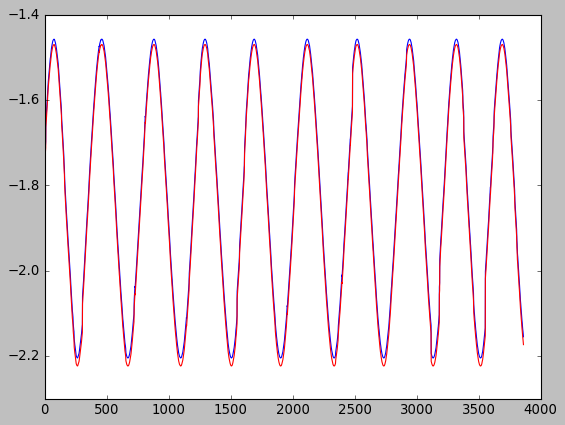

In [4]:
print(len(pee_day_list[0]))

plt.plot(pee_day_list[0], 'b-')
plt.plot(pee_day_list[1], 'r-')



#plt.plot(pee_night_list[0], 'b-')
#plt.plot(pee_night_list[1], 'r-')


#plt.plot(frame_predicted_total_signal.time_day, pee_day_list[1], '.')

#plt.plot(frame_predicted_total_signal.time_day, pee_night_list[0], '.')
#plt.plot(frame_predicted_total_signal.time_day, pee_night_list[1], '.')

In [16]:
def ExposureTime(lam):
    t_year = np.linspace(0,1,365)
    sin_deltas = - np.sin(0.4091) * np.cos(2 * np.pi * t_year)
    cos_deltas = np.sqrt(1 - sin_deltas**2)
    t_day = np.arange(0,0.5,0.001)

    cos_lam = np.cos(np.radians(lam))
    sin_lam = np.sin(np.radians(lam))

    #labels= [r'$\rm Jan$', r'$\rm Jun$', r'$\rm s$']
    exposure_list = [[]for i in range (4)]

    for i in range(len(sin_deltas)):
        cos_eta = cos_lam * cos_deltas[i] * np.cos(2 * np.pi * t_day) - sin_lam * sin_deltas[i]

        exposure_list[0].append(i)
        

        if len(t_day[cos_eta>=0]) == len(t_day):
            exposure_list[2].append(0)
            exposure_list[3].append(24)
        elif  0 < len(t_day[cos_eta>=0]) < len(t_day)  : 
            exposure_list[2].append(24 - t_day[cos_eta>=0][-1]*24*2)
            exposure_list[3].append(t_day[cos_eta>=0][-1]*24*2)
        else:
            exposure_list[2].append(24)
            exposure_list[3].append(0)


        exposure_list[1].append(t_year[i] * 365)
    return np.array(exposure_list).T


frame_predicted_total_signal.time_day = ExposureTime(90)
frame_predicted_total_signal.time_ev = frame_predicted_total_signal.time_day[:,1] * 2.4 * 6. * 6. * 1.519 
frame_predicted_total_signal.theta_p = (2 * np.pi / 365.25) * frame_predicted_total_signal.time_day[:,1]
msw_signal_fraction = frame_predicted_total_signal.__getitem__(param) 
r_bar_k = frame_predicted_total_signal.rbar_k


frame_predicted_total_signal.time_day = ExposureTime(0)
frame_predicted_total_signal.time_ev = frame_predicted_total_signal.time_day[:,1] * 2.4 * 6. * 6. * 1.519 
frame_predicted_total_signal.theta_p = (2 * np.pi / 365.25) * frame_predicted_total_signal.time_day[:,1]
msw_signal_fraction_2 = frame_predicted_total_signal.__getitem__(param) 
r_bar_k2 = frame_predicted_total_signal.rbar_k


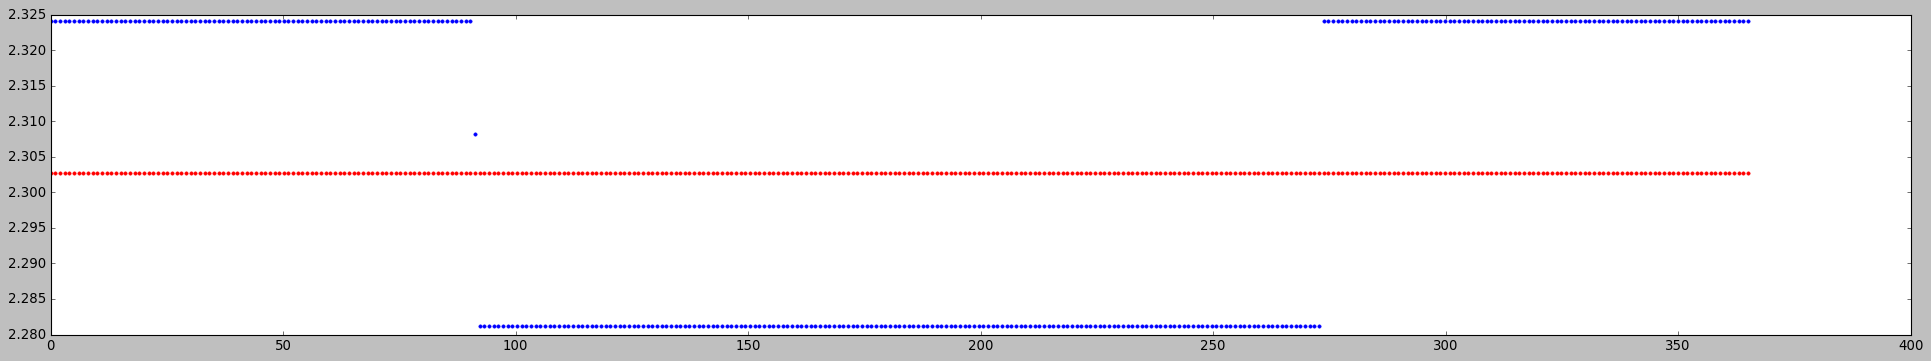

In [17]:
plt.figure(figsize=(30,5))
#plt.xlim(0,3600)
#plt.ylim(-0.5,0.5)

#plt.plot(frame_predicted_total_signal.time_day[:,1], msw_signal_fraction, 'b.')
#plt.plot(frame_predicted_total_signal.time_day[:,1], msw_signal_fraction_2, 'r.')


plt.plot(frame_predicted_total_signal.time_day[:,1], r_bar_k, 'b.')
plt.plot(frame_predicted_total_signal.time_day[:,1], r_bar_k2, 'r.')



#plt.plot(frame_predicted_total_signal.time_weights[:,1], msw_signal_fraction_2, 'r.')

<ErrorbarContainer object of 3 artists>

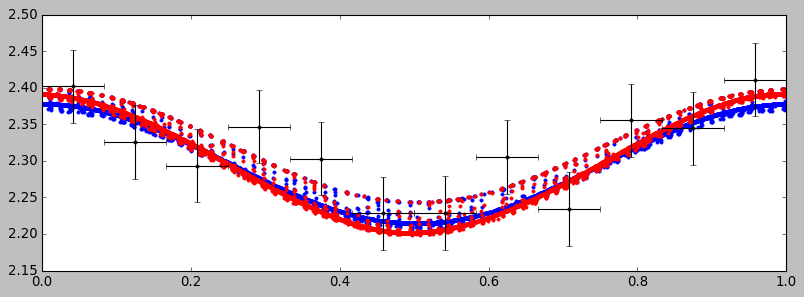

In [6]:
day_from_prehelion = frame_predicted_total_signal.time_weights[:,1] + 257

# time_bins = np.linspace(0,1,13)
# bin_prediction_msw = np.zeros((len(time_bins),2))
# bin_prediction_msw2 = np.zeros((len(time_bins),2))

# day_from_prehelion = frame_predicted_total_signal.time_weights[:,1] + 257

# for i in range (len(time_bins)-1):
#     cond = (((day_from_prehelion % 365.25)/365.25) >= time_bins[i]) & (((day_from_prehelion % 365.25)/365.25) < time_bins[i+1])
#     T_k = np.sum(frame_predicted_total_signal.time_weights[cond,2:],axis=1)
#     bin_prediction_msw[i,1] = (1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction[cond])
#     bin_prediction_msw[i,0] = annual_data[i,0]
#     bin_prediction_msw2[i,1] = (1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction_2[cond])
#     bin_prediction_msw2[i,0] = annual_data[i,0]

plt.figure(figsize=(12,4))
plt.xlim(0,1)
plt.plot(((day_from_prehelion % 365.25)/365.25), msw_signal_fraction , 'b.')
plt.plot(((day_from_prehelion % 365.25)/365.25), msw_signal_fraction_2 , 'r.')


plt.errorbar(annual_data[:,0], annual_data[:,1], 0.05 * np.ones(12), 0.5*(annual_data[1,0] - annual_data[0,0])*np.ones(12) , fmt='k.')

In [3]:
param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0.02, 
        'mu3'  : 0.  ,
        'mdm'  : 0.2 , 
        'alpha': 0.  ,
        'eps' : 0.5  ,
        'alpha_eps' : 0. ,
        'M12'  : 6.9e-5 }
ULDM_signal_fraction = frame_predicted_total_signal.__getitem__(param) 

In [ ]:
param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 0.07, 
        'mu3'  : 0.  ,
        'mdm'  : 900*2e-6 , 
        'alpha': 2.  ,
        'eps' : 0.5  ,
        'alpha_eps' : 0. ,
        'M12'  : 6.9e-5 }
ULDM_signal_fraction = frame_predicted_total_signal.__getitem__(param) 

In [105]:
time_bins = np.unique(frame_predicted_total_signal.time_weights[:,0])
bin_prediction_msw = np.zeros((len(time_bins),2))
bin_prediction_uldm = np.zeros((len(time_bins),2))

for i in range(len(time_bins)):
    cond = frame_predicted_total_signal.time_weights[:,0] == time_bins[i]
    T_k = np.sum(frame_predicted_total_signal.time_weights[cond,2:],axis=1)
    bin_prediction_msw[i,1] = (1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction[cond])
    bin_prediction_msw[i,0] = data[i,0]
    bin_prediction_uldm[i,1] = (1/np.sum(T_k)) * np.sum(T_k * ULDM_signal_fraction[cond])
    bin_prediction_uldm[i,0] = data[i,0]

<ErrorbarContainer object of 3 artists>

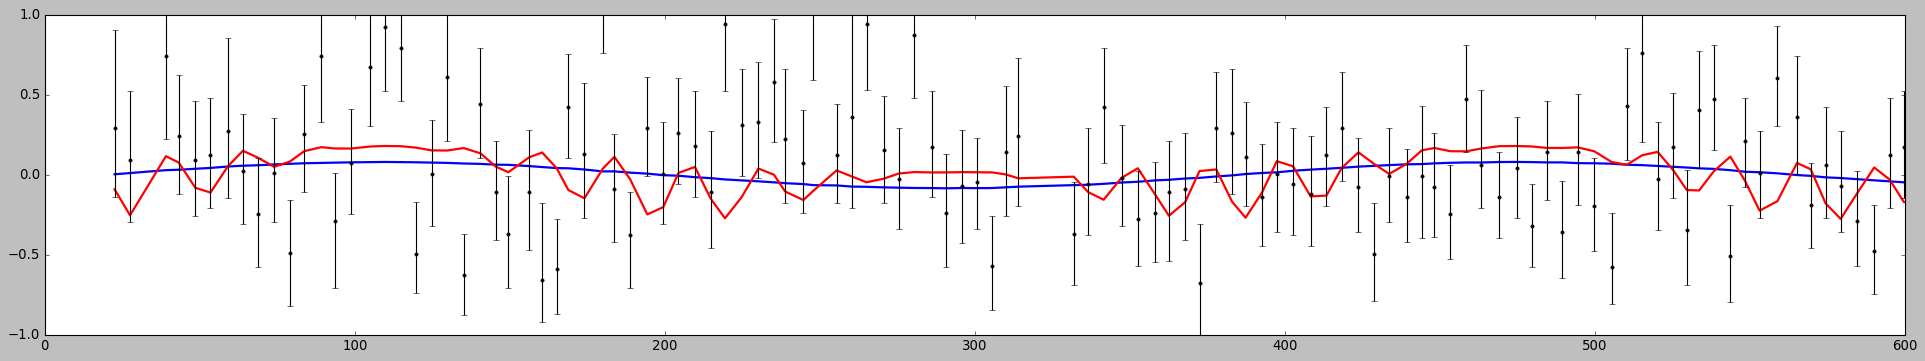

In [106]:
plt.figure(figsize=(30,5))
plt.xlim(0,600)
plt.ylim(-1,1)

#plt.plot(frame_predicted_total_signal.time_weights[:,1], msw_signal_fraction, 'b.')
#plt.plot(frame_predicted_total_signal.time_weights[:,1], ULDM_signal_fraction, 'r.')


plt.plot(bin_prediction_msw[:,0], bin_prediction_msw[:,1] - np.mean(bin_prediction_msw[:,1]),lw=2,ls='-',color='b')
plt.plot(bin_prediction_uldm[:,0], bin_prediction_uldm[:,1] - np.mean(bin_prediction_uldm[:,1]), lw=2,ls='-',color='r')


plt.errorbar(data[:,0], data[:,1] - np.mean(data[:,1]), np.array((data[:,3],data[:,2])), fmt='k.')

In [84]:
day_from_prehelion = frame_predicted_total_signal.time_weights[:,1] + 257

time_bins = np.linspace(0,1,13)
bin_prediction_msw = np.zeros((len(time_bins),2))
bin_prediction_uldm = np.zeros((len(time_bins),2))

day_from_prehelion = frame_predicted_total_signal.time_weights[:,1] + 257

for i in range (len(time_bins)-1):
    cond = (((day_from_prehelion % 365.25)/365.25) >= time_bins[i]) & (((day_from_prehelion % 365.25)/365.25) < time_bins[i+1])
    T_k = np.sum(frame_predicted_total_signal.time_weights[cond,2:],axis=1)
    bin_prediction_msw[i,1] = (1/np.sum(T_k)) * np.sum(T_k * msw_signal_fraction[cond])
    bin_prediction_msw[i,0] = annual_data[i,0]
    bin_prediction_uldm[i,1] = (1/np.sum(T_k)) * np.sum(T_k * ULDM_signal_fraction[cond])
    bin_prediction_uldm[i,0] = annual_data[i,0]
    

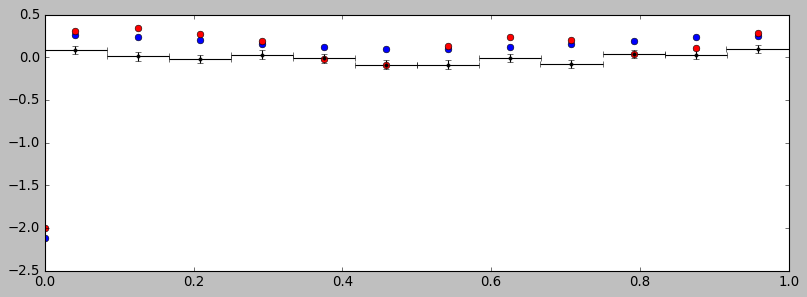

In [87]:
plt.figure(figsize=(12,4))
plt.xlim(0,1)

plt.errorbar(annual_data[:,0], annual_data[:,1] - np.mean(annual_data[:,1]), 0.05 * np.ones(12), 0.5*(annual_data[1,0] - annual_data[0,0])*np.ones(12) , fmt='k.')



#plt.plot(((day_from_prehelion % 365.25)/365.25), msw_signal_fraction , 'b.')
#plt.plot(((day_from_prehelion % 365.25)/365.25), ULDM_signal_fraction , 'r.')

# plt.plot(bin_prediction_msw[:,0], bin_prediction_msw[:,1] ,'o')
# plt.plot(bin_prediction_uldm[:,0], bin_prediction_uldm[:,1],'o')


plt.plot(bin_prediction_msw[:,0], bin_prediction_msw[:,1] - np.mean(bin_prediction_msw[:,1]),'o',color='b')
plt.plot(bin_prediction_uldm[:,0], bin_prediction_uldm[:,1] - np.mean(bin_prediction_uldm[:,1]), 'o',color='r')